1. load dataset

In [42]:
import torch
from torchvision import datasets, transforms

# transform: converts images to tensors and normalizes them
transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

print(f"train_data: {len(train_data)}")
print(f"test_data: {len(test_data)}")

train_data: 60000
test_data: 10000


2. with DataLoader shuffle and batch data

In [43]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [44]:
images, labels = next(iter(train_loader))

print(images.shape)
print(labels.shape)

# 64 images, 1 channel (grayscale), 28x28 pixels
# each emage with 1 class label (0-9)

torch.Size([64, 1, 28, 28])
torch.Size([64])


3. build the model

In [45]:
import torch.nn as nn
import torch.nn.functional as F

class FashionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 1st hidden layer
        self.fc2 = nn.Linear(128, 64)  # 2nd hidden layer
        self.fc3 = nn.Linear(64, 10)  # output layer (10 classes)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # flatten 28x28 -> 784
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # logits (no softwax yet)
        return x

device = torch.device("cpu")
model = FashionMNISTModel().to(device)
model     
        

FashionMNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

4. loss and optimizer   

In [46]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # updates paramaters (weights and biases) using Adam optimizer

In [47]:
print(model.parameters)

<bound method Module.parameters of FashionMNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)>


5. training loop

In [48]:
epochs = 5

for epoch in range(epochs):
    model.train()  # train mode, enables gradient updates
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()  # clear old gradients
        outputs = model(images)  # forward pass
        loss = loss_fn(outputs, labels)
        loss.backward()  # compute gradients
        optimizer.step()  # update weights
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")
        
        
        

Epoch [1/5], Loss: 0.5173
Epoch [2/5], Loss: 0.4067
Epoch [3/5], Loss: 0.3773
Epoch [4/5], Loss: 0.3737
Epoch [5/5], Loss: 0.3555


6. evaluation

In [49]:
correct = 0
total = 0

model.eval()  # eval mode (turns off batchnorm, dropout)
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total 
print(f"Test accuracy: {accuracy:.2f}%")     
print("correct: ", correct)   
print("total: ", total)

        


Test accuracy: 85.94%
correct:  8594
total:  10000


7. inference

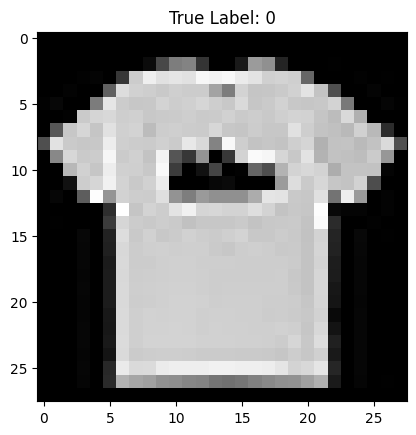

In [50]:
# true label
import matplotlib.pyplot as plt

image, label = test_data[9902]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"True Label: {label}")
plt.show()

In [51]:
# predicted label
model.eval()
with torch.no_grad():
    image = image.unsqueeze(0)  # add batch dimension [1, 1, 28, 28]
    output = model(image)
    pred = torch.argmax(output, dim=1).item()
    print(f"Predicted label: {pred}")
    

Predicted label: 0


In [52]:
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Predicted:", classes[pred])
print("Actual:", classes[label])


Predicted: T-shirt/top
Actual: T-shirt/top


8. save model

In [53]:
torch.save(model.state_dict(), "fashion_mnist_torch.pth")

9. load model 

In [54]:
# model = FashionMNISTModel()
# model.load_state_dict(torch.load("fashion_mnist_torch.pth"))
# model.eval()

10. save checkpoint for later resume training

In [ ]:
torch.save({
    "epoch": epoch,
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),  # stateful
    "loss": loss
}, "checkpoint.pth")

11. load checkpoint

In [56]:
# checkpoint = torch.load("checkpoint.pth")

# model = FashionMNISTModel()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# model.load_state_dict(checkpoint["model_state_dict"])
# optimizer.load_state_dict(checkpoint["optimizer_state_dict"])

# epoch = checkpoint["epoch"]
# loss = checkpoint["loss"]

# model.train()



In [57]:

torch.save(model, "fashion_mnist_full_model.pth")
print("Full model saved!")


Full model saved!
